In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_26531_G')

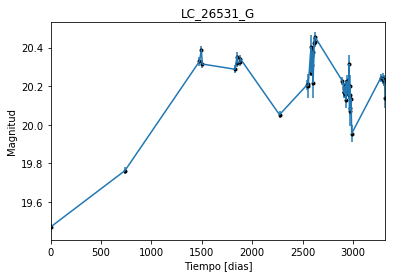

In [2]:
data = np.genfromtxt('LC_26531_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_26531_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

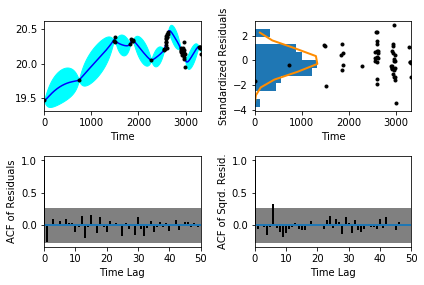

In [5]:
sample.assess_fit()

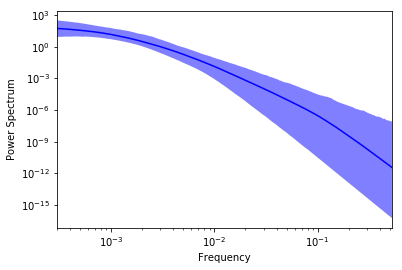

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_26531_G')

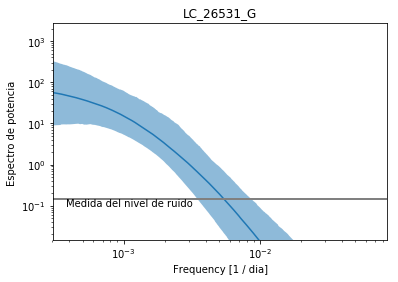

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_26531_G')

Text(0.5,1,'Prediccion , valor esperado LC_26531_G')

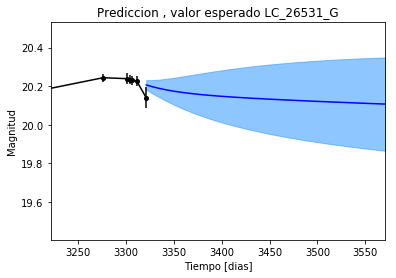

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_26531_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_26531_G')

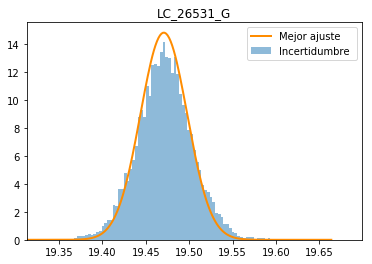

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_26531_G')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_G')

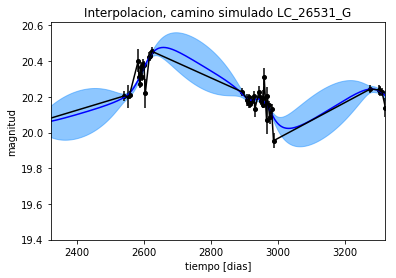

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_G')

Text(0.5,1,'Interpolacion, camino simulado LC_26531_G')

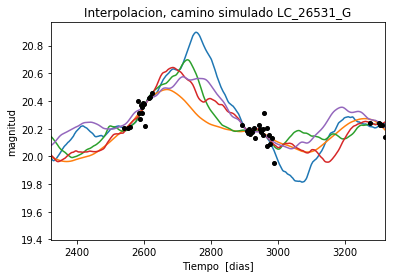

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_26531_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1100.27061188
Median: 0.0205785490058
Standard deviation: 0.219871205732
68% credibility interval: [ 0.00167382  0.26129512]
95% credibility interval: [  4.00198859e-04   8.46246510e-01]
99% credibility interval: [  3.11896289e-04   1.01005136e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1775.65048407
Median: 0.00192188377124
Standard deviation: 0.083043127279
68% credibility interval: [ 0.00048627  0.01683028]
95% credibility interval: [ 0.0003204   0.22626824]
99% credibility interval: [  3.05211414e-04   6.91002407e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 2394.75553742
Median: 0.0142576902197
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1545.97331777
Median: 90.3250954332
Standard deviation: 1.67878287802
68% credibility interval: [ 88.43146855  91.62474268]
95% credibility interval: [ 86.02699141  92.292599  ]
99% credibility interval: [ 83.78564113  92.64850848]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1154.25632041
Median: 0.770469292373
Standard deviation: 2.20669341805
68% credibility interval: [ 0.06754541  4.1646086 ]
95% credibility interval: [ 0.01745428  7.27140037]
99% credibility interval: [  0.01127715  10.12378436]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 754.816167095
Median: 0.425941937486
Standard deviation: 8.38618074469
68% credibility interval: [ 0.02013659  6.39774439]
95% credibility interval: [  2.31295927e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 9081.332722
Median: 4.11741195704e-41
Standard deviation: 1.05487325928e+51
68% credibility interval: [  2.99267536e-70   3.70884807e-13]
95% credibility interval: [  2.36286291e-93   8.64637622e+01]
99% credibility interval: [  6.56739113e-105   1.42061000e+041]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3110.27365187
Median: 20.0313860179
Standard deviation: 0.184328478826
68% credibility interval: [ 19.87043061  20.18204873]
95% credibility interval: [ 19.64896385  20.3888839 ]
99% credibility interval: [ 19.43332007  20.55831668]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 392.020346819
Median: 0.000227466585406
Standard deviation: 0.233640474433
68% credibility interval: [ 0.          0.27932116]
95% credibility interval: [ 0.          0.86410532]
99% credibility interval: [ 0.          1.01940776]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 392.020346819
Median: 0.000227466585406
Standard deviation: 0.233640474433
68% credibility interval: [ 0.          0.27932116]
95% credibility interval: [ 0.          0.86410532]
99% credibility interval: [ 0.          1.01940776]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 908.88819941
Median: 0.0
Standard deviation: 0.000425144972845
68%

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1545.97331777
Median: 90.3250954332
Standard deviation: 1.67878287802
68% credibility interval: [ 88.43146855  91.62474268]
95% credibility interval: [ 86.02699141  92.292599  ]
99% credibility interval: [ 83.78564113  92.64850848]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3231.65998305
Median: 0.114904599449
Standard deviation: 0.129883123365
68% credibility interval: [ 0.06873321  0.21647353]
95% credibility interval: [ 0.04592599  0.49216974]
99% credibility interval: [ 0.0360686   0.83221966]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2281.88422169
Median: 1.26663921545
Standard deviation: 0.203237981705
68% credibility interval: [ 1.08658844  1.48881044]
95% credibility interval: [ 0.93504481  1.74529408]
99% credibility interval: [ 0.86269376  1.87607936]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1982.49905096
Median: 0.000200681148109
Standard deviation: 0.0324580546404
68% credibility interval: [  7.58852396e-06   3.56395377e-03]
95% credibility interval: [  1.02452415e-07   2.21516508e-02]
99% credibility interval: [  4.55017272e-45   4.80257994e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1100.27061188
Median: (-0.129298836756+0j)
Standard deviation: 2.01582777654
68% credibility interval: [-1.64176569+0.j         -0.01051690-2.09642115j]
95% credibility interval: [ -5.31712363e+00+0.j          -2.51452359e-03-0.00314554j]
99% credibility interval: [ -6.34633987e+00+0.j          -1.95970218e-03-0.00773424j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1775.65048407
Median: (-0.0120755518736+0.00816436243558j)
Standard deviation: 1.55797699033
68% credibility interval: [-0.10574777+0.02289329j -0.00305530+0.j        ]
95% credibility interval: [-1.42168529+3.95452126j -0.00201315+0.04305129j]
99% credibility interval: [ -4.34169617e+00+2.46576645j  -1.91769987e-03+0.j        ]
Posterior summary for pa